<a href="https://colab.research.google.com/github/mo72001/T5/blob/main/Project_of_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, adjusted_rand_score

## Load the Data

In [101]:
df = pd.read_csv('Traffic_Accidents.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  int64  
 1   Location_Northing_OSGR                       52000 non-null  int64  
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [103]:
df.shape

(52000, 26)

In [104]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530,103950,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860,187170,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460,169130,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700,408330,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488,350090,-2.203020,53.047882,21,3.0,2,2.0,6/8/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [105]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125,319380,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682,127058,-1.192915,51.040030,44,3.0,1,1.0,8/5/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510,152250,0.012032,51.252055,45,3.0,3,1.0,1/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720,334000,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710,185430,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [106]:
df.sample()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
5521,413710,96920,-1.806957,50.771639,55,3.0,1,2.0,2/1/2010,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Frost/Ice,2.0,Yes,2010


In [107]:
df['Road_Type']

,Road_Type
0,Dual carriageway
1,Single carriageway
2,Single carriageway
3,One way street
4,Single carriageway
...,...
51995,Single carriageway
51996,Single carriageway
51997,Single carriageway
51998,Single carriageway


In [108]:
df['1st_Road_Class']

,1st_Road_Class
0,3
1,4
2,6
3,6
4,6
...,...
51995,3
51996,3
51997,5
51998,5


In [109]:
df['2nd_Road_Class']

,2nd_Road_Class
0,-1
1,6
2,3
3,6
4,-1
...,...
51995,6
51996,-1
51997,6
51998,5


In [110]:
df['2nd_Road_Number']

,2nd_Road_Number
0,0
1,0
2,4055
3,0
4,0
...,...
51995,6485
51996,0
51997,0
51998,81


In [111]:
df['1st_Road_Number']

,1st_Road_Number
0,22
1,466
2,0
3,0
4,0
...,...
51995,607
51996,272
51997,85
51998,81


In [112]:
df['Local_Authority_(District)']

,Local_Authority_(District)
0,556
1,26
2,746
3,84
4,257
...,...
51995,365
51996,502
51997,516
51998,323


In [113]:
df['Local_Authority_(Highway)']

,Local_Authority_(Highway)
0,E10000011
1,E09000017
2,W06000014
3,E10000017
4,E06000021
...,...
51995,E10000018
51996,E10000014
51997,E10000030
51998,E06000015


In [114]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [115]:
df.duplicated().sum()

43

In [116]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
df.nunique()

,0
Location_Easting_OSGR,30693
Location_Northing_OSGR,32580
Longitude,50901
Latitude,50701
Police_Force,51
Accident_Severity,3
Number_of_Vehicles,13
Number_of_Casualties,19
Date,3286
Day_of_Week,7


In [119]:
df.drop(['Date','Local_Authority_(District)','Police_Force','Local_Authority_(Highway)','1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number'], axis=1, inplace=True)  ### drop ununderstandable data

In [120]:
df['Accident_Severity'].fillna(df['Accident_Severity'].mean(), inplace=True)
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(), inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Number_of_Casualties'].mean(), inplace=True)
df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0], inplace=True)

In [121]:
def remove_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for i in df.select_dtypes(exclude=['object']).columns:
    df = remove_outliers(df,i)

In [122]:
label = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = label.fit_transform(df[i])

In [123]:
stand = StandardScaler()
for i in df.select_dtypes(exclude=['object']).columns:
    print(i)
    df[i] = stand.fit_transform(df[[i]])


Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Day_of_Week
Road_Type
Speed_limit
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
Year


In [124]:
X = pd.DataFrame(df).to_numpy()
Z = (X - X.mean()) / X.std()
# Let's say, components = 2
pca = PCA(n_components=2)
pca_X = pca.fit_transform(Z)
pca_X

array([[-1.55350171,  0.10173782],
       [ 0.69966261, -0.99570012],
       [ 2.26583409, -1.12623989],
       ...,
       [-1.29484751,  0.02828704],
       [-0.22091247, -0.95503761],
       [-1.86768681,  3.01578558]])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [125]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Road_Type', 'Speed_limit',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [126]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
0.0,21693


In [127]:
cor = df.corr()
cor

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
Location_Easting_OSGR,1.000000,-0.522726,0.999461,-0.525374,NaN,0.030579,NaN,-0.003050,0.022546,0.017693,0.030487,0.024601,-0.008243,-0.053730,-0.074512,NaN,0.025311,0.045060
Location_Northing_OSGR,-0.522726,1.000000,-0.529298,0.999974,NaN,-0.041607,NaN,0.003906,-0.025062,0.007264,-0.045988,-0.004757,0.009759,0.042695,0.076252,NaN,-0.016405,-0.023598
Longitude,0.999461,-0.529298,1.000000,-0.531835,NaN,0.031672,NaN,-0.002947,0.023202,0.017924,0.031565,0.023356,-0.008080,-0.054021,-0.074884,NaN,0.024520,0.044971
Latitude,-0.525374,0.999974,-0.531835,1.000000,NaN,-0.041432,NaN,0.003862,-0.025054,0.007310,-0.045921,-0.004870,0.009634,0.042757,0.076323,NaN,-0.016590,-0.023773
Accident_Severity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_Vehicles,0.030579,-0.041607,0.031672,-0.041432,NaN,1.000000,NaN,-0.019007,-0.055674,0.081058,0.022388,-0.050394,0.047758,0.007812,0.014030,NaN,-0.000933,-0.002738
Number_of_Casualties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_of_Week,-0.003050,0.003906,-0.002947,0.003862,NaN,-0.019007,NaN,1.000000,-0.011794,-0.005843,-0.004403,0.012168,-0.003499,-0.013431,-0.006713,NaN,0.008824,-0.004104
Road_Type,0.022546,-0.025062,0.023202,-0.025054,NaN,-0.055674,NaN,-0.011794,1.000000,-0.338126,0.008863,-0.067820,0.019909,0.000203,-0.021637,NaN,-0.013596,0.003888
Speed_limit,0.017693,0.007264,0.017924,0.007310,NaN,0.081058,NaN,-0.005843,-0.338126,1.000000,0.001985,-0.029766,-0.020004,0.000791,0.028339,NaN,0.038139,-0.036294


In [128]:
df = df.drop(['Accident_Severity','Urban_or_Rural_Area','Number_of_Casualties'],axis=1)

In [129]:
##df = df.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Speed_limit','Road_Type','Speed_limit'], axis=1)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

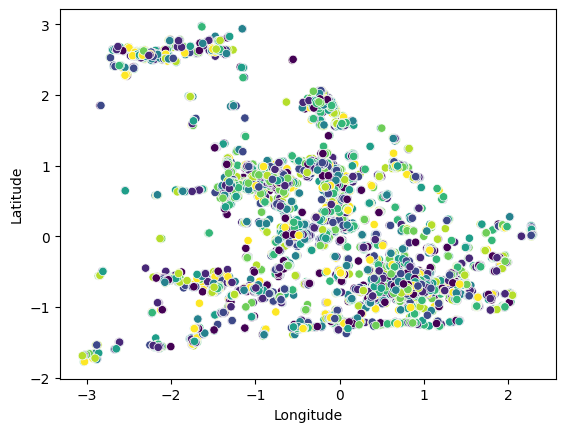

In [130]:
sns.scatterplot(data = df , x='Longitude',y='Latitude',c = df['Year'])
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

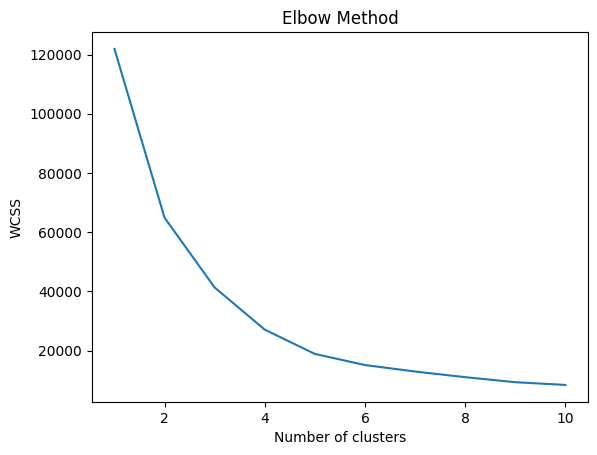

In [131]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(pca_X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [133]:
y_pred = kmeans_model.predict(pca_X)
print(adjusted_rand_score(df['Year'],y_pred))

0.0006450719941783453


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


## Plot the data points with their predicted cluster center

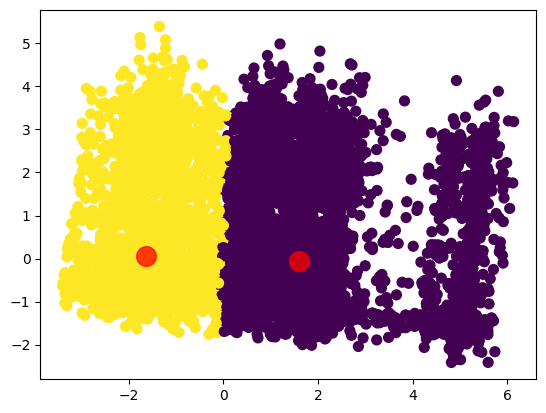

In [134]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Mark the centroids
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
  **Answer** doesn't have relation with other columns
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   **Answer** by elbow method
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   **Answer** adjusted_rand_score
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?